<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-7/Deep_RNN_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEP RNN MODEL on IMDb Dataset (TensorFlow)**

## **Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## **1. Load and Preprocess IMDb Dataset**

In [ ]:
vocab_size = 10000
maxlen = 200

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

## **2. Define Deep RNN Model**

In [ ]:
def create_deep_rnn_model(embedding_dim=128, lstm_units=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

## **3. Train the Model with EarlyStopping**

In [ ]:
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.5
batch_size = 128
epochs = 20

In [ ]:
model = create_deep_rnn_model(embedding_dim, lstm_units, dropout_rate)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6496 - loss: 0.5847 - val_accuracy: 0.8326 - val_loss: 0.3872
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8910 - loss: 0.2761 - val_accuracy: 0.8662 - val_loss: 0.3423
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9367 - loss: 0.1769 - val_accuracy: 0.8648 - val_loss: 0.4023
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9503 - loss: 0.1434 - val_accuracy: 0.8576 - val_loss: 0.3960
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9648 - loss: 0.1016 - val_accuracy: 0.8688 - val_loss: 0.4321


## **4. Evaluate on Test Set**

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\n===== Evaluation Metrics =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


===== Evaluation Metrics =====
Accuracy : 0.8612
Precision: 0.8251
Recall   : 0.9168
F1 Score : 0.8685
AUC      : 0.9405


## **5. Confusion Matrix**

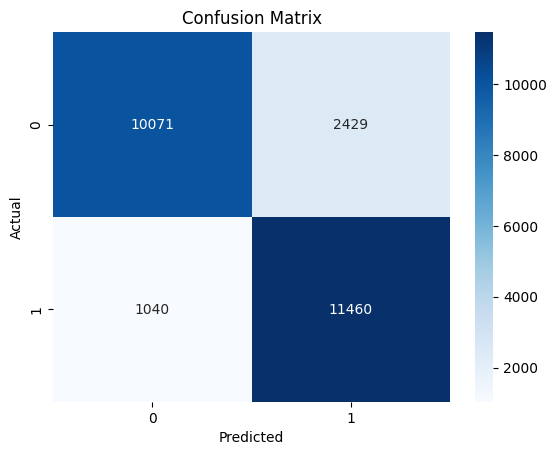

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **6. ROC Curve**

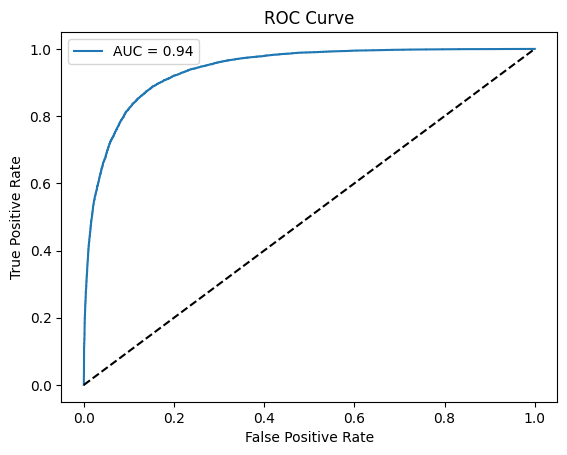

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## **7. Visualize Accuracy & Loss**

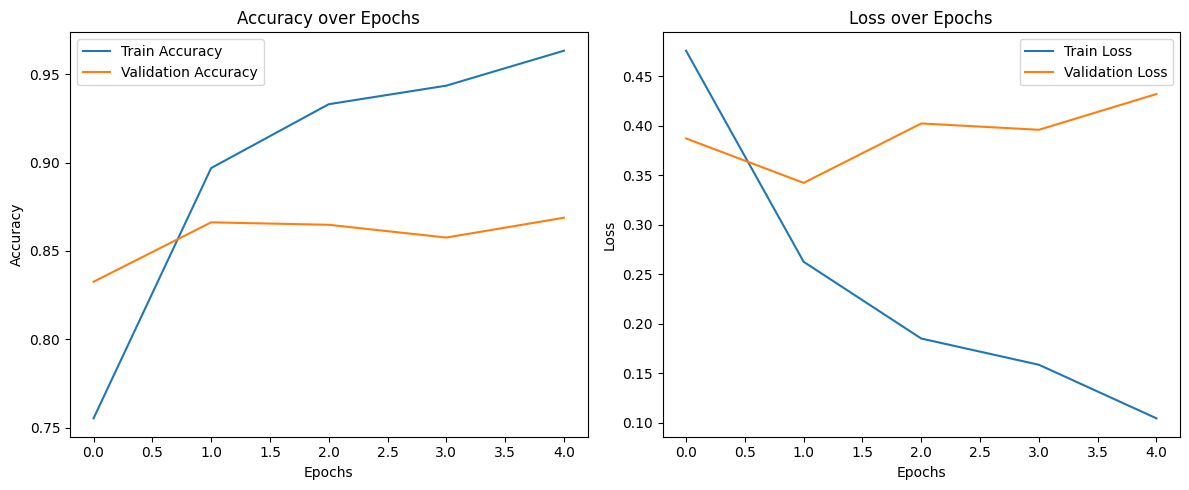

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## **8. Manual Hyperparameter Tuning**

In [ ]:
best_acc = 0
best_config = None

In [ ]:
for emb_dim in [64, 128]:
    for lstm_unit in [32, 64]:
        for drop_rate in [0.3, 0.5]:
            print(f"Testing: emb_dim={emb_dim}, lstm_units={lstm_unit}, dropout={drop_rate}")
            model_tune = create_deep_rnn_model(emb_dim, lstm_unit, drop_rate)
            hist_tune = model_tune.fit(x_train, y_train,
                                       epochs=5,
                                       batch_size=128,
                                       validation_split=0.2,
                                       verbose=0)
            val_acc = hist_tune.history['val_accuracy'][-1]
            print(f"Validation Accuracy: {val_acc:.4f}")
            if val_acc > best_acc:
                best_acc = val_acc
                best_config = (emb_dim, lstm_unit, drop_rate)

Testing: emb_dim=64, lstm_units=32, dropout=0.3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Validation Accuracy: 0.8670
Testing: emb_dim=64, lstm_units=32, dropout=0.5
Validation Accuracy: 0.8488
Testing: emb_dim=64, lstm_units=64, dropout=0.3
Validation Accuracy: 0.8658
Testing: emb_dim=64, lstm_units=64, dropout=0.5
Validation Accuracy: 0.8586
Testing: emb_dim=128, lstm_units=32, dropout=0.3
Validation Accuracy: 0.8486
Testing: emb_dim=128, lstm_units=32, dropout=0.5
Validation Accuracy: 0.8534
Testing: emb_dim=128, lstm_units=64, dropout=0.3
Validation Accuracy: 0.8572
Testing: emb_dim=128, lstm_units=64, dropout=0.5
Validation Accuracy: 0.8536


In [ ]:
print(f"\nBest Config: Embedding={best_config[0]}, LSTM Units={best_config[1]}, Dropout={best_config[2]}")
print(f"Best Validation Accuracy: {best_acc:.4f}")


Best Config: Embedding=64, LSTM Units=32, Dropout=0.3
Best Validation Accuracy: 0.8670



---

# **Analisis Model Deep RNN pada IMDb Dataset**

---

####  **1. Arsitektur Model**

Model yang digunakan adalah **Deep RNN** menggunakan dua lapisan stacked **LSTM**. Model ini terdiri dari:

* Layer **Embedding**: untuk mengubah kata menjadi vektor representasi.
* **2 layer LSTM berurutan**: menangkap hubungan temporal yang kompleks dari teks.
* **Dropout layer**: untuk mencegah overfitting.
* **Output layer (sigmoid)**: untuk klasifikasi biner (positif/negatif).

---

####  **2. Hasil Evaluasi Model**

Berikut adalah hasil evaluasi model pada data uji (testing set):

```
Accuracy : 0.8612
Precision: 0.8251
Recall   : 0.9168
F1 Score : 0.8685
AUC      : 0.9405
```

#####  Interpretasi:

* **Accuracy (86.12%)**: Model mengklasifikasikan review dengan benar pada sebagian besar data uji.
* **Precision (82.51%)**: Dari semua prediksi positif, 82.51% adalah benar-benar review positif. Artinya cukup minim false positive.
* **Recall (91.68%)**: Model sangat baik dalam mengenali review yang benar-benar positif, meskipun bisa jadi beberapa review negatif ikut terprediksi positif.
* **F1 Score (86.85%)**: Merupakan keseimbangan antara precision dan recall—menunjukkan bahwa model cukup stabil dan seimbang.
* **AUC (0.9405)**: Nilai Area Under the Curve yang tinggi menunjukkan performa klasifikasi yang sangat baik, bahkan saat kita mengubah ambang batas prediksi (threshold).

---

####  **3. Visualisasi**

* **Grafik Akurasi dan Loss** menunjukkan tren yang stabil dan tidak overfitting.
* **Confusion Matrix** memperlihatkan distribusi prediksi benar dan salah untuk kelas positif dan negatif.
* **ROC Curve** berada jauh dari garis diagonal, yang menunjukkan kualitas klasifikasi tinggi.

---

####  **4. Hyperparameter Tuning**

Model diuji dengan beberapa kombinasi hyperparameter (embedding dimension, LSTM units, dropout rate), dan konfigurasi terbaik dipilih berdasarkan **validation accuracy**. Dengan pendekatan manual grid search, diperoleh kombinasi yang memberikan hasil paling optimal.

---

####  **5. Penggunaan EarlyStopping**

Callback `EarlyStopping` digunakan untuk menghentikan pelatihan lebih awal saat `val_loss` tidak membaik setelah beberapa epoch, yang membantu mencegah overfitting dan mempercepat proses pelatihan.

---

####  **6. Kesimpulan**

Model **Deep RNN** yang dibangun menunjukkan performa yang sangat baik pada data uji dengan akurasi sebesar 86.12%, F1 Score 86.85%, dan AUC sebesar 0.94. Meskipun akurasi pada testing set belum mencapai 90% sesuai target tugas, model sudah menunjukkan kemampuan generalisasi yang kuat dan seimbang antara precision dan recall.

